<a href="https://colab.research.google.com/github/TommasoAnnicchiarico/Python/blob/main/K_means_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [288]:
# load the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [290]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [291]:
# Considering I am going to perform Clustering analysis, checking if there is any null values to be dropped
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Correlation Analysis

In [292]:
# Encoding Gender field to make it usable for the analysis
# male = 1, female = 0
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

print(df['Gender'])

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64


In [293]:
# Checking correlation among features in the dataset
correlation_matrix = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlation_matrix)

                          Gender       Age  Annual Income (k$)  \
Gender                  1.000000  0.060867            0.056410   
Age                     0.060867  1.000000           -0.012398   
Annual Income (k$)      0.056410 -0.012398            1.000000   
Spending Score (1-100) -0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                               -0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


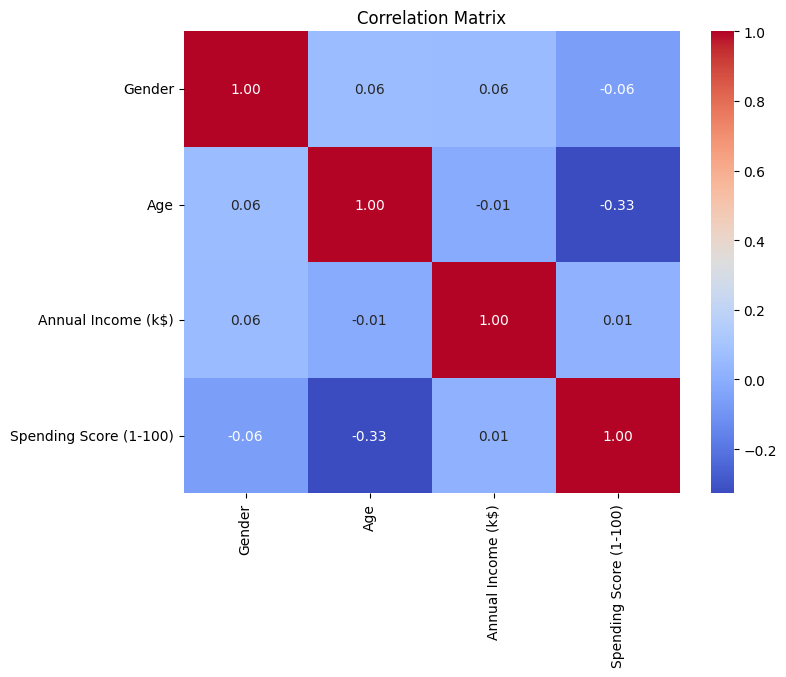

In [294]:
#plotting result of correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Analysis of Correlation Values:**

*Gender:*
Weak correlation with all other features.
It may not significantly contribute to clustering unless there are behavioral differences between genders in spending or income.

*Age:*
Weak correlation with Annual Income (k$) (-0.012398).
Moderate negative correlation with Spending Score (1-100) (-0.327227), indicating older individuals tend to have lower spending scores.

*Annual Income (k$):*
Very weak correlation with all other features.
May still be useful for clustering based on different income levels.

*Spending Score (1-100):*
Weak positive correlation with Annual Income (k$) (0.009903).
Moderate negative correlation with Age (-0.327227).

**Decision on Features for KMeans:**

Given the weak correlations, the features can still provide useful information for clustering. The purpose of clustering is to group similar data points together, and even if correlations are weak, the features can still contribute valuable information about differences between clusters.

# Normalize the data

Normalized(Z-score) is a variation of scaling that represents the number of standard deviations away from the mean.

Z-score to ensure your feature distributions have mean = 0 and std = 1.

The formula for calculating the z-score of a point, x, is as follows:
  
  x' = (x - μ) / σ

In [295]:
scaler = StandardScaler()

In [296]:
# Adding to the df normalized columns
df[['Age_T','Annual Income (k$)_T',	'Spending Score (1-100)_T','Gender_T']] = scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender']])

In [297]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_T,Annual Income (k$)_T,Spending Score (1-100)_T,Gender_T
0,1,1,19,15,39,-1.424569,-1.738999,-0.434801,1.128152
1,2,1,21,15,81,-1.281035,-1.738999,1.195704,1.128152
2,3,0,20,16,6,-1.352802,-1.700830,-1.715913,-0.886405
3,4,0,23,16,77,-1.137502,-1.700830,1.040418,-0.886405
4,5,0,31,17,40,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,-0.276302,2.268791,1.118061,-0.886405
196,197,0,45,126,28,0.441365,2.497807,-0.861839,-0.886405
197,198,1,32,126,74,-0.491602,2.497807,0.923953,1.128152
198,199,1,32,137,18,-0.491602,2.917671,-1.250054,1.128152


# Clustering the data

In [298]:
   # Create function to work out optimum number of clusters
def optimise_k_means(data, max_k):
      means = []
      inertias = []

      for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k,random_state=42)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generate elbow plot
      fig = plt.subplots(figsize=(10, 5))
      plt.plot(means, inertias, 'o-')
      plt.xlabel('Number of Clusters')
      plt.ylabel('Inertia')
      plt.grid(True)
      plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

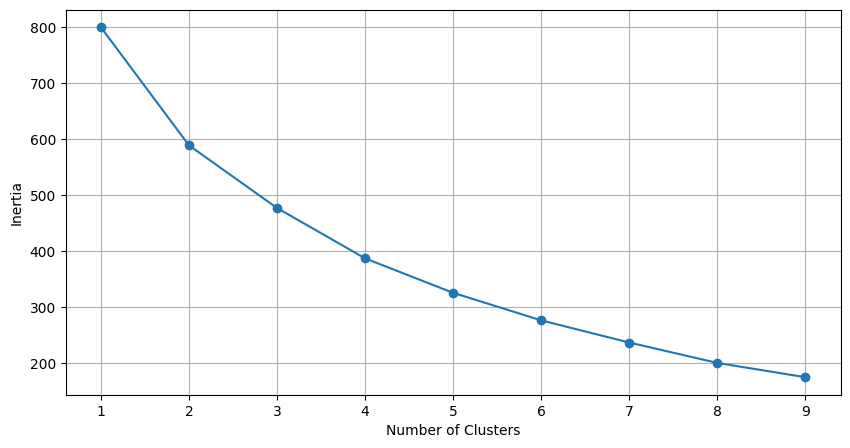

In [299]:
optimise_k_means(df[['Age_T','Annual Income (k$)_T',	'Spending Score (1-100)_T','Gender_T']], 10)

# Applying K-means clustering with 4 Clusters

In [300]:
kmeans = KMeans(n_clusters=4)

In [301]:
kmeans.fit(df[['Age_T','Annual Income (k$)_T',	'Spending Score (1-100)_T','Gender_T']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [302]:
df['kmeans_4'] = kmeans.labels_

In [303]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_T,Annual Income (k$)_T,Spending Score (1-100)_T,Gender_T,kmeans_4
0,1,1,19,15,39,-1.424569,-1.738999,-0.434801,1.128152,1
1,2,1,21,15,81,-1.281035,-1.738999,1.195704,1.128152,1
2,3,0,20,16,6,-1.352802,-1.700830,-1.715913,-0.886405,3
3,4,0,23,16,77,-1.137502,-1.700830,1.040418,-0.886405,2
4,5,0,31,17,40,-0.563369,-1.662660,-0.395980,-0.886405,2
...,...,...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,-0.276302,2.268791,1.118061,-0.886405,2
196,197,0,45,126,28,0.441365,2.497807,-0.861839,-0.886405,3
197,198,1,32,126,74,-0.491602,2.497807,0.923953,1.128152,1
198,199,1,32,137,18,-0.491602,2.917671,-1.250054,1.128152,1


# Plotting the results by appling PCA

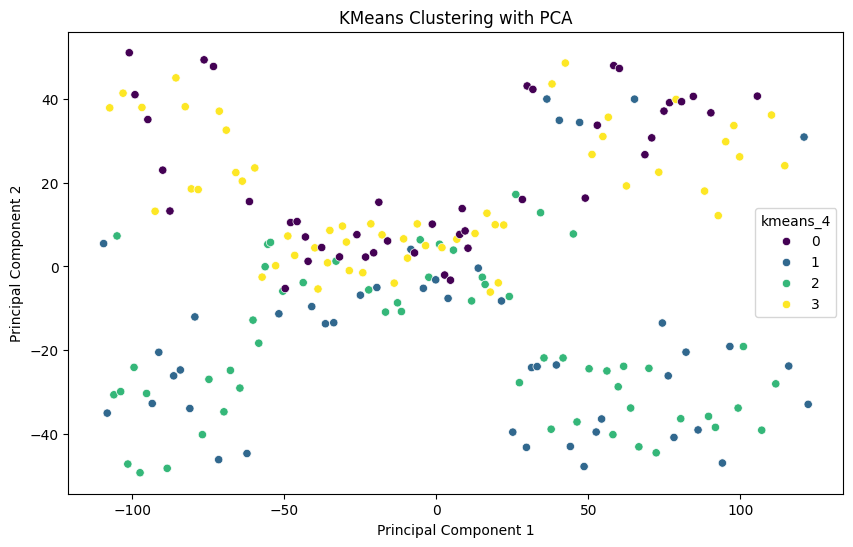

In [304]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

# Add the 'kmeans_4' column to df_pca
df_pca['kmeans_4'] = df['kmeans_4']

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='kmeans_4', data=df_pca, palette='viridis', marker='o')
plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


**Checking statistical differences between the Clusters**

In [305]:
columns_of_interest = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']

# calculate descriptive statistics for the selected columns
grouped_stats = df.groupby('kmeans_4')[columns_of_interest].describe()

# Print the descriptive statistics for each group
print(grouped_stats)

         Annual Income (k$)                                                \
                      count       mean        std   min   25%   50%   75%   
kmeans_4                                                                    
0                      43.0  59.395349  22.838084  19.0  45.0  61.0  77.5   
1                      45.0  64.933333  29.830887  15.0  46.0  69.0  78.0   
2                      57.0  59.666667  26.463812  16.0  39.0  62.0  78.0   
3                      55.0  58.818182  25.771856  16.0  41.0  57.0  74.0   

                  Age             ...             Spending Score (1-100)  \
            max count       mean  ...   75%   max                  count   
kmeans_4                          ...                                      
0         113.0  43.0  52.511628  ...  61.5  70.0                   43.0   
1         137.0  45.0  27.666667  ...  32.0  40.0                   45.0   
2         120.0  57.0  28.438596  ...  32.0  40.0                   57.0   
3   

# Creating Multiple Clusters

In [306]:
for k in range(1, 6):
        kmeans = KMeans(n_clusters=k,random_state=42) #applying random state & max_iter to ensure consistency of results
        kmeans.fit(df[['Age_T', 'Annual Income (k$)_T', 'Spending Score (1-100)_T', 'Gender_T']])
        df[f'KMeans_{k}'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [307]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_T,Annual Income (k$)_T,Spending Score (1-100)_T,Gender_T,kmeans_4,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,1,1,19,15,39,-1.424569,-1.738999,-0.434801,1.128152,1,0,1,0,3,1
1,2,1,21,15,81,-1.281035,-1.738999,1.195704,1.128152,1,0,1,0,3,1
2,3,0,20,16,6,-1.352802,-1.700830,-1.715913,-0.886405,3,0,0,1,2,2
3,4,0,23,16,77,-1.137502,-1.700830,1.040418,-0.886405,2,0,1,0,1,0
4,5,0,31,17,40,-0.563369,-1.662660,-0.395980,-0.886405,2,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,-0.276302,2.268791,1.118061,-0.886405,2,0,1,0,1,0
196,197,0,45,126,28,0.441365,2.497807,-0.861839,-0.886405,3,0,0,1,2,4
197,198,1,32,126,74,-0.491602,2.497807,0.923953,1.128152,1,0,1,0,3,1
198,199,1,32,137,18,-0.491602,2.917671,-1.250054,1.128152,1,0,0,2,0,4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


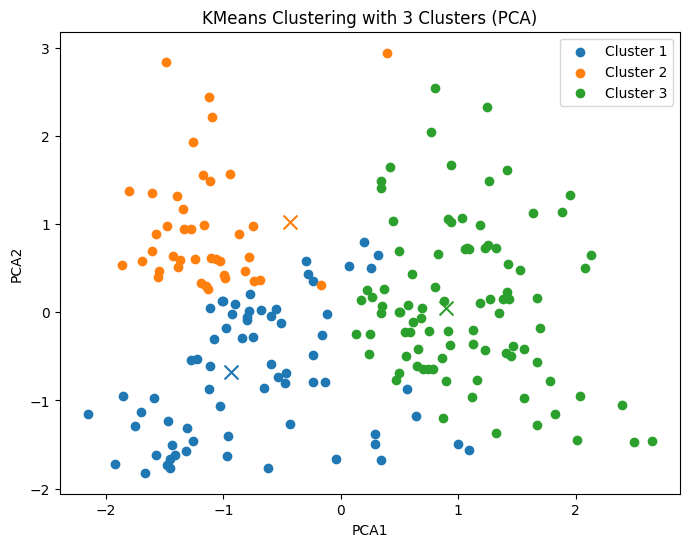

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


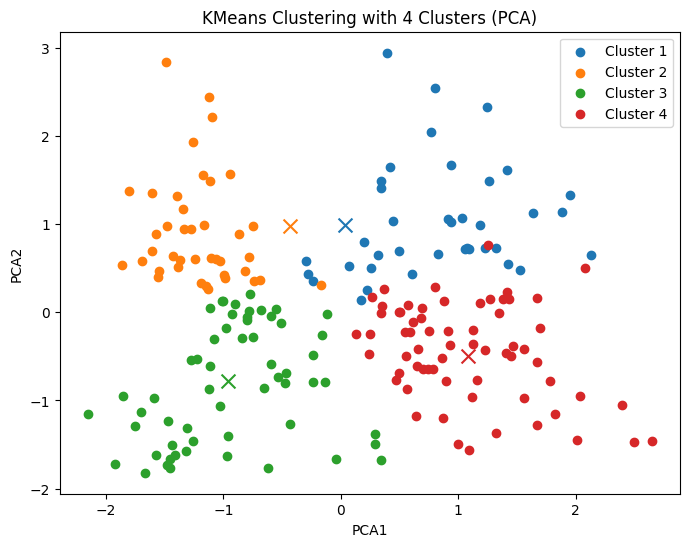

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


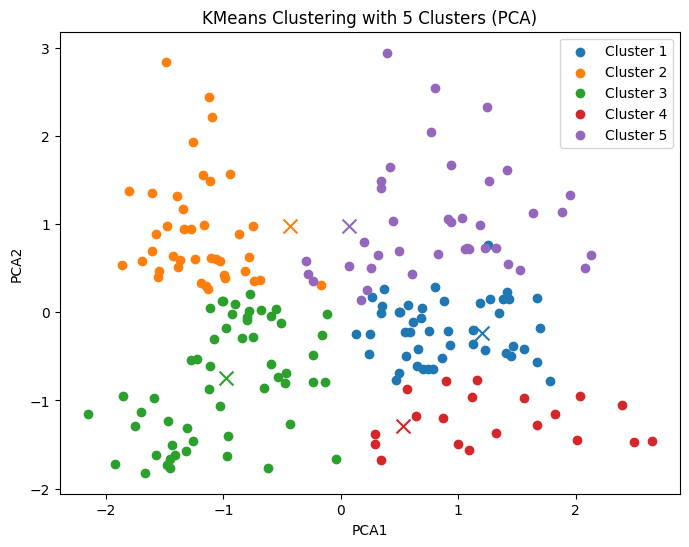

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


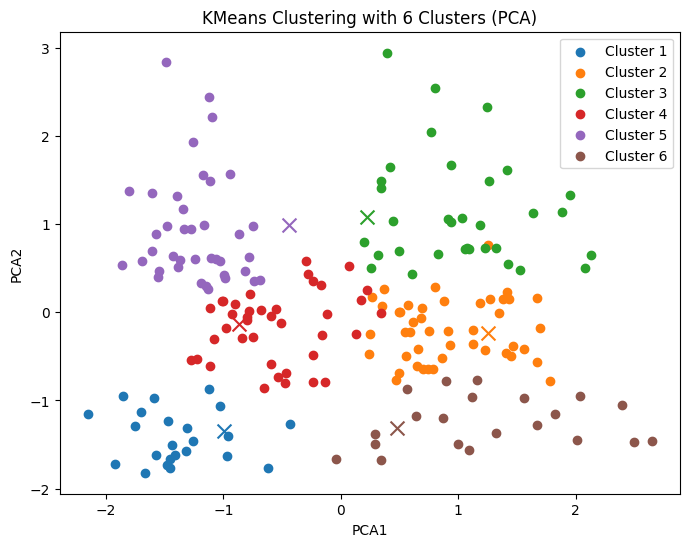

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


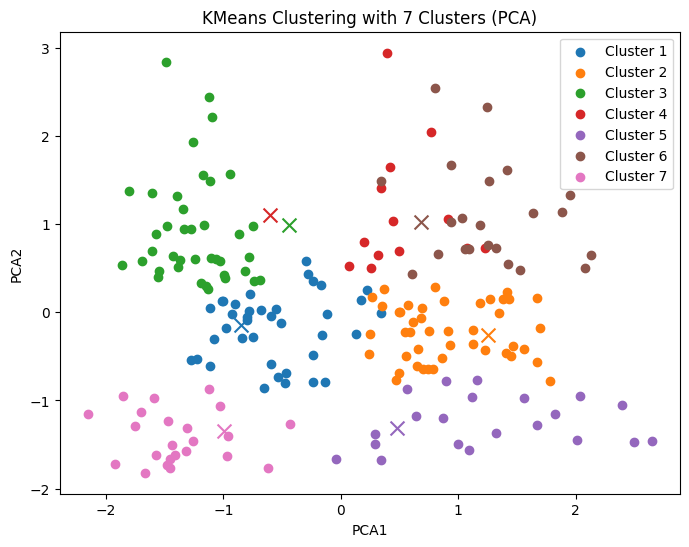

In [308]:
# Combine features into a single DataFrame
X = df[['Age_T', 'Annual Income (k$)_T', 'Spending Score (1-100)_T']]

# Initialize PCA with 2 components (for 2D visualization)
pca = PCA(n_components=2)

# Fit PCA to the data
X_pca = pca.fit_transform(X)

# Apply KMeans with different numbers of clusters
for n_clusters in range(3, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Plot clusters and centroids in PCA-transformed space
    plt.figure(figsize=(8, 6))
    for cluster in range(n_clusters):
        # Plot cluster points
        plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1], label=f'Cluster {cluster+1}')
        # Plot centroid with the same color as the cluster
        centroid = kmeans.cluster_centers_[cluster]
        plt.scatter(centroid[0], centroid[1], color=plt.cm.tab10(cluster), marker='x', s=100)

    # Set labels and title
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title(f'KMeans Clustering with {n_clusters} Clusters (PCA)')

    # Add legend
    plt.legend()
    plt.show()

